In [1]:
import tensorflow as tf

from data_loader.kitty_road_data_loader import KittyRoadLoader
from models.fcn_alexnet_model import FcnAlexnetModel
from trainers.fcn_alexnet_trainer import FcnAlexnetTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
json_file = "configs/fcn_alexnet_KittyRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)
data = KittyRoadLoader(config)

batch_size: 2
checkpoint_dir: ./experiments\fcn_alexnet_kittyroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: fcn_alexnet_kittyroad
image_size:
- 320
- 480
learning_rate: 0.00023949513325777832
max_to_keep: 5
num_epochs: 30
num_iter_per_epoch: 100
summary_dir: ./experiments\fcn_alexnet_kittyroad\summary/

Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (2312, 320, 480, 3)
Size of masks collection :  (2312, 320, 480)


In [2]:
latest_checkpoint = tf.train.latest_checkpoint(config.checkpoint_dir)
latest_checkpoint

'./experiments\\fcn_alexnet_kittyroad\\checkpoint/-3030'

In [ ]:
# new_model.save_weights(latest_checkpoint)
# new_model = FcnAlexnetModel(config)
# new_model.load_weights(latest_checkpoint)

In [3]:
sess = tf.Session() 
new_saver = tf.train.import_meta_graph("./experiments/fcn_alexnet_kittyroad/checkpoint/-3030.meta")
new_saver.restore(sess,latest_checkpoint)
print("Model Loaded")

INFO:tensorflow:Restoring parameters from ./experiments\fcn_alexnet_kittyroad\checkpoint/-3030
Model Loaded


In [5]:
graph =  tf.get_default_graph()
for op in graph.get_operations() :
    print(op.name)

global_step/global_step/initial_value
global_step/global_step
global_step/global_step/Assign
global_step/global_step/read
cur_epoch/cur_epoch/initial_value
cur_epoch/cur_epoch
cur_epoch/cur_epoch/Assign
cur_epoch/cur_epoch/read
cur_epoch/add/y
cur_epoch/add
cur_epoch/Assign
save/Const
save/SaveV2/tensor_names
save/SaveV2/shape_and_slices
save/SaveV2
save/control_dependency
save/RestoreV2/tensor_names
save/RestoreV2/shape_and_slices
save/RestoreV2
save/Assign
save/Assign_1
save/restore_all
Placeholder
inputs/X
inputs/y
conv_0/kernel/Initializer/random_uniform/shape
conv_0/kernel/Initializer/random_uniform/min
conv_0/kernel/Initializer/random_uniform/max
conv_0/kernel/Initializer/random_uniform/RandomUniform
conv_0/kernel/Initializer/random_uniform/sub
conv_0/kernel/Initializer/random_uniform/mul
conv_0/kernel/Initializer/random_uniform
conv_0/kernel
conv_0/kernel/Assign
conv_0/kernel/read
conv_0/bias/Initializer/zeros
conv_0/bias
conv_0/bias/Assign
conv_0/bias/read
conv_0/dilation_rate


loss/gradients/conv_6/BiasAdd_grad/BiasAddGrad
loss/gradients/conv_6/BiasAdd_grad/tuple/group_deps
loss/gradients/conv_6/BiasAdd_grad/tuple/control_dependency
loss/gradients/conv_6/BiasAdd_grad/tuple/control_dependency_1
loss/gradients/conv_6/Conv2D_grad/ShapeN
loss/gradients/conv_6/Conv2D_grad/Conv2DBackpropInput
loss/gradients/conv_6/Conv2D_grad/Conv2DBackpropFilter
loss/gradients/conv_6/Conv2D_grad/tuple/group_deps
loss/gradients/conv_6/Conv2D_grad/tuple/control_dependency
loss/gradients/conv_6/Conv2D_grad/tuple/control_dependency_1
loss/gradients/conv_5/Relu_grad/ReluGrad
loss/gradients/conv_5/BiasAdd_grad/BiasAddGrad
loss/gradients/conv_5/BiasAdd_grad/tuple/group_deps
loss/gradients/conv_5/BiasAdd_grad/tuple/control_dependency
loss/gradients/conv_5/BiasAdd_grad/tuple/control_dependency_1
loss/gradients/conv_5/Conv2D_grad/ShapeN
loss/gradients/conv_5/Conv2D_grad/Conv2DBackpropInput
loss/gradients/conv_5/Conv2D_grad/Conv2DBackpropFilter
loss/gradients/conv_5/Conv2D_grad/tuple/group_

conv_5/bias/Adam_1
conv_5/bias/Adam_1/Assign
conv_5/bias/Adam_1/read
conv_6/kernel/Adam/Initializer/zeros/shape_as_tensor
conv_6/kernel/Adam/Initializer/zeros/Const
conv_6/kernel/Adam/Initializer/zeros
conv_6/kernel/Adam
conv_6/kernel/Adam/Assign
conv_6/kernel/Adam/read
conv_6/kernel/Adam_1/Initializer/zeros/shape_as_tensor
conv_6/kernel/Adam_1/Initializer/zeros/Const
conv_6/kernel/Adam_1/Initializer/zeros
conv_6/kernel/Adam_1
conv_6/kernel/Adam_1/Assign
conv_6/kernel/Adam_1/read
conv_6/bias/Adam/Initializer/zeros/shape_as_tensor
conv_6/bias/Adam/Initializer/zeros/Const
conv_6/bias/Adam/Initializer/zeros
conv_6/bias/Adam
conv_6/bias/Adam/Assign
conv_6/bias/Adam/read
conv_6/bias/Adam_1/Initializer/zeros/shape_as_tensor
conv_6/bias/Adam_1/Initializer/zeros/Const
conv_6/bias/Adam_1/Initializer/zeros
conv_6/bias/Adam_1
conv_6/bias/Adam_1/Assign
conv_6/bias/Adam_1/read
conv7/kernel/Adam/Initializer/zeros/shape_as_tensor
conv7/kernel/Adam/Initializer/zeros/Const
conv7/kernel/Adam/Initializer

In [2]:

# # create the model
# model = FcnAlexnetModel(config)
# sess = tf.Session()
# # create tensorboard logger
# logger = Logger(sess, config)
# # create trainer and pass all the previous components to it
# trainer = FcnAlexnetTrainer(sess, model, data, config, logger)
# #load model if exists
# model.load(sess)


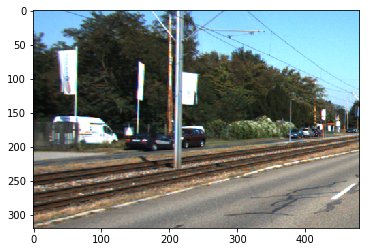

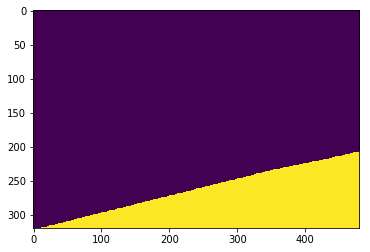

I want to predict sth...


In [7]:
img, mask = data.get_data_element("all_data",703)
plt.imshow(img)
plt.show()
plt.imshow(mask)
plt.show()
#predict
print("I want to predict sth...")

In [9]:
y_proba = graph.get_tensor_by_name("output/y_proba:0")

In [11]:
X = graph.get_tensor_by_name("inputs/X:0")

In [12]:
im_pred = sess.run(
            y_proba,
            feed_dict = {X: [img]})

FailedPreconditionError: Attempting to use uninitialized value conv_0/bias
	 [[node conv_0/bias/read (defined at <ipython-input-3-a4c3de865bc9>:2)  = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](conv_0/bias)]]

Caused by op 'conv_0/bias/read', defined at:
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-a4c3de865bc9>", line 2, in <module>
    new_saver = tf.train.import_meta_graph("./experiments/fcn_alexnet_kittyroad/checkpoint/-3030.meta")
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1674, in import_meta_graph
    meta_graph_or_file, clear_devices, import_scope, **kwargs)[0]
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1696, in _import_meta_graph_with_return_elements
    **kwargs))
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\meta_graph.py", line 806, in import_scoped_meta_graph_with_return_elements
    return_elements=return_elements)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\importer.py", line 442, in import_graph_def
    _ProcessNewOps(graph)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\importer.py", line 234, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3440, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3440, in <listcomp>
    for c_op in c_api_util.new_tf_operations(self)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3299, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value conv_0/bias
	 [[node conv_0/bias/read (defined at <ipython-input-3-a4c3de865bc9>:2)  = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](conv_0/bias)]]


In [4]:
# X_real,y_real = data.get_data_element("all_data",500)
# import scipy
# saver = tf.train.import_meta_graph("./experiments/fcn_alexnet_kittyroad/checkpoint/-3030.meta")
# with tf.Session() as sess : 
#     latest_checkpoint = tf.train.latest_checkpoint(config.checkpoint_dir)
#     if latest_checkpoint:
#         print("Loading model checkpoint {} ...\n".format(latest_checkpoint))
#         saver.restore(sess, latest_checkpoint)
#         print("Model loaded")
#     im_pred = sess.run(
#             y_proba,
#             feed_dict = {X: X_real})
    
#     im_softmax = im_pred.reshape((-1,320*480,2))
# #     print(im_softmax.shape)
# #     print(im_pred.shape)
#     Z = y_proba.eval(feed_dict = {X : [X_real]})
#     y_pred = np.argmax(Z,axis=1).reshape(320,480)
#     print(y_pred)    
#     plt.imshow(X_real)
#     plt.show()
#     plt.imshow(y_real)
#     plt.show()
#     plt.imshow(y_pred)
#     plt.show()
# #     for i in range(im_softmax.shape[0]) : 
# #         im = im_softmax[i][:, 1].reshape(320, 480)
# #         segmentation = (im > 0.5).reshape(320, 480, 1)
# #         mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
# #         mask = scipy.misc.toimage(mask, mode="RGBA")
# #         street_im = scipy.misc.toimage(X_real[i])
# #         street_im.paste(mask, box=None, mask=mask)
# #         plt.imshow(street_im)
# #         plt.show()  
# #     print( accuracy.eval(feed_dict={X: X_real, y: y_real}))